
# Introducción

En la era actual de la medicina preventiva y la atención personalizada, la capacidad de identificar tempranamente condiciones de salud como el síndrome metabólico se ha convertido en un objetivo crucial. El síndrome metabólico, una combinación de factores de riesgo que incluyen hipertensión, obesidad abdominal, niveles elevados de glucosa en sangre y dislipidemia, no solo aumenta el riesgo de enfermedades cardiovasculares y diabetes tipo 2, sino que también representa una carga significativa para los sistemas de salud en todo el mundo.

En este contexto, este trabajo busca explorar y comprender en profundidad la relación entre diversas variables biomédicas y el síndrome metabólico. A través de un enfoque exhaustivo que abarca desde el análisis exploratorio de datos hasta la implementación de técnicas avanzadas de aprendizaje automático, el objetivo es desarrollar un modelo predictivo preciso que pueda identificar a las personas en riesgo de síndrome metabólico, permitiendo así intervenciones médicas tempranas y personalizadas.

Para lograr este objetivo, nuestro trabajo se divide en varias etapas:

1. **Análisis Exploratorio de Datos (EDA)**.
2. **Relaciones bivariadas**.
3. **Aplicación de Algoritmos de Aprendizaje Automático**.
4. **Creación de una Red Neurronal para realizar clasificación binaria**.
   
A través de este enfoque integral, espero contribuir al avance en la detección y prevención del síndrome metabólico, allanando el camino hacia una salud más personalizada para todos.
: 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

Importamos algunas librerías para la manipulación de datos y algunas más para crear visualizaciones 

In [2]:
raw_df = pd.read_csv("Metabolic Syndrome.csv", index_col=0)
raw_df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
seqn,,,,,,,,,,,,,,
62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


Para empezar nuestra exploración de los datos verificamos el tipo de dato y el número de observaciones para cada una de las columnas, en este set de datos encontramos 3 variables categoricas correspondientes al estado marital, al sexo, la raza, albuminuria y la presencia de síndrome metabólico. Todas las demás variables corresponden a variables numéricas continuas y discretas correspondientes a diversas mediciones, tomando en cuenta el dominio al que corresponden resaltan entre estas el indice de masa corporal (BMI), la glucosa sanguinea, el colesterol bueno (HDL) y triacilgliceridos. Cabe mencionar que dentro del total de información hay datos faltantes de algunas columnas, esto lo abordaré en un momento posterior

 Con respecto a la exploratoria de las variables cuantitativas podemos extrer información relevante como:
- El intervalo de edades dentro de la muestra va desde los 20 años hasta los 80 con una media de 48.7 años.
- Los ingresos medios de la muestra rondan los 4000 dolares con una desviación estandar de 2954 dolares lo que sugiere una gran   heterogeneidad en cuanto a los salarios.
- El índice de masa corporal medio es de 28.7, esto es importante debido a que la organización mundial de la     salud            establece que un indice de masa corporal saludable se encuentra en el rango de 19 a 24 (algunos autores sugieren el           intervalo de 18 a 25), además de una desviación estandar de 6.66, sugiriendo que dentro de esta muestra son quienes se         encuentran en cerca del límite inferior del intervarlo quienes presentan una relación adecuada entre su peso y su estatura,     sugieriendo normopeso que es la ralación que busca retratar el IMC o IBM. No obstante el IMC puede verse alterado por el       entrenamiento de musculación debido a su influencia en el peso, por lo que lo planteado es simplemente una hipótesis.
- La media de la concentración de glucosa en sangre es de 108.24 mg/dl con una desviación estandar de 34.82 mg/dl lo cual se     considera normal  para la mayoría, teniendo en cuenta que la concentración de esta tras desayunar se presume normal según       algunos autores entre 90 y 126.
- Con respecto al HDL la media se encuentra en 53.4 mg/dl con una desviación estandar de 15.18, el intervalo saludable de este   se encuentra entre 40 y 60 mg/dl lo que representa normalidad para la mayoría de la muestra, en este punto puede resaltarse     que las concentraciones por encima de 60 suelen estar asociadas a menor riesgo de enfermedad cardiovascular.
- Finalmente se considera que una concentración normal de triglicéridos en sangre se encuentra por debajo de 150 mg/dl, en la     muestra muestra encontramos una media de 128.12 mg/dl y una desviación estandar de 95.32 lo que sugiere que casi la mitad de   los participantes de la muestra presentan una concentración elevada de los mismos.

In [3]:
df = raw_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2401 entries, 62161 to 71915
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2284 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2316 non-null   float64
 6   BMI                2375 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 281.4+ KB


In [4]:
df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


Aquí podemos observar la proporción de individuos que presentan síndrome metabólico dentro del concjunto de datos y los que no siendo 0 quienes no lo presentan y 1 los que por el contrario sí lo presentan. Modificando los labels para una mejor interpretación se vería así:

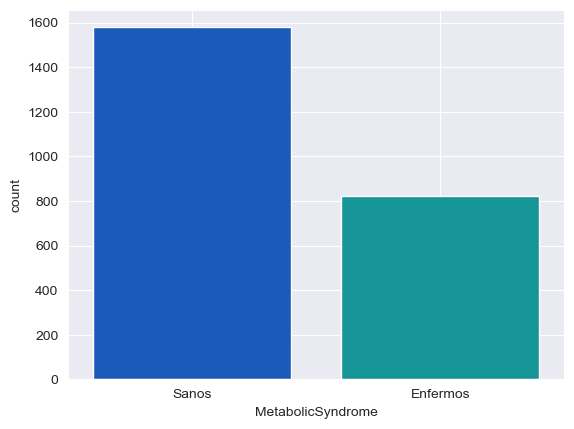

In [7]:
sns.countplot(x = "MetabolicSyndrome", data = df, palette = "winter")
plt.grid(True)
plt.xticks(ticks =plt.xticks()[0], labels = ["Sanos", "Enfermos"])
plt.show()

En este primer diagrama de caja se relaciona el síndrome metabólico con la edad a simple vista, puede inferirse que hay una prevalencia mayor de síndrome metabólico en personas de edad tanto más avanzada con respecto los más jóvenes, posteriormente ahondaré en esto con el fin de averiguar si existe una diferencia significativa 

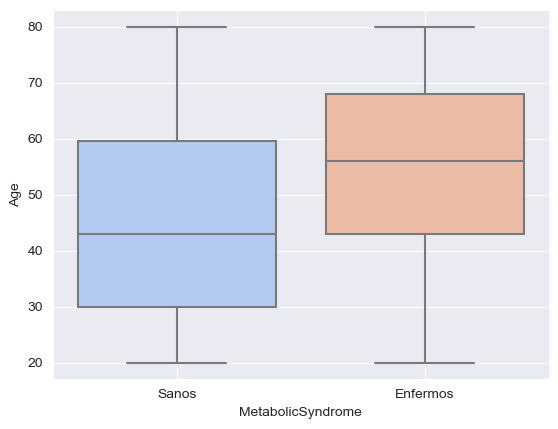

In [8]:
sns.boxplot(x = "MetabolicSyndrome", y="Age", data = df , palette ="coolwarm")
plt.grid(True)
plt.xticks(ticks =plt.xticks()[0], labels = ["Sanos", "Enfermos"])
plt.show()

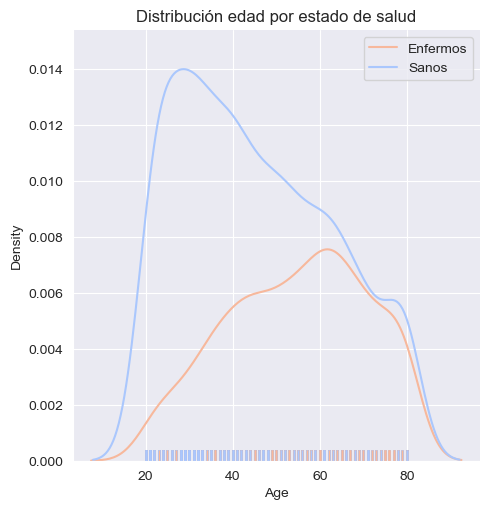

In [12]:
sns.displot(x= "Age", data = df, hue = "MetabolicSyndrome", rug = True, kind = "kde", palette = "coolwarm", legend = False)
plt.title("Distribución edad por estado de salud")
plt.legend(labels = ["Enfermos","Sanos"])
plt.show()

In [15]:
from scipy.stats import kstest, levene

Se llevó a cabo la prueba de Kolmogorov-Smirnov para evaluar si las edades de los individuos sanos y enfermos siguen una distribución normal. Los valores p obtenidos fueron extremadamente bajos (pvalue=0.0) en ambos grupos, lo que indica una significativa discrepancia con la hipótesis de normalidad. Por lo tanto, no se cumplen los supuestos de normalidad requeridos por los tests paramétricos.

Además, se realizó una prueba de Levene para evaluar la homogeneidad de varianzas entre los grupos. El resultado mostró un valor p significativamente bajo (pvalue=0.000296), lo que indica una diferencia significativa en las varianzas de las edades entre los grupos sanos y enfermos. Esto contradice el supuesto de homogeneidad de varianzas necesario para los tests paramétricos.

Dado que los datos no siguen una distribución normal y las varianzas no son homogéneas, se justifica la utilización de un enfoque no paramétrico para la comparación de las edades entre los grupos. Por lo tanto, se optará por realizar un test no paramétrico, como el test de Mann-Whitney-U, que es robusto en presencia de tales desviaciones de los supuestos paramétricos.

In [17]:
sanos_edad = df[df["MetabolicSyndrome"]==0]["Age"]
enfermos_edad = df[df["MetabolicSyndrome"]==1]["Age"]
estat_sanos, sanos_p_value = kstest(sanos_edad, "norm")
estat_enfermos, enfermos_p_value = kstest(enfermos_edad, "norm")
print(f"el valor p para la prueba de Kolmogorov en los individuos sanos es: {sanos_p_value}")
print(f"el valor p para la prueba de Kolmogorov en los individuos enfermos es: {enfermos_p_value}")
stat_levene, p_valor_levene = levene(sanos_edad, enfermos_edad)
print(f'Levene test p-value es :{p_valor_levene}')

el valor p para la prueba de Kolmogorov en los individuos sanos es: 0.0
el valor p para la prueba de Kolmogorov en los individuos enfermos es: 0.0
Levene test p-value es :0.000296382548152175


Se llevó a cabo un test U de Mann-Whitney para comparar las edades entre individuos sanos y enfermos con síndrome metabólico. Los resultados del test indican una diferencia significativa en las distribuciones de edades entre los dos grupos (p-value < 0.05).

El valor p obtenido fue extremadamente bajo, con un valor de p igual a 3.04 x 10^-35. Esto indica una evidencia sustancial en contra de la hipótesis nula de que las medianas de las edades en ambos grupos son iguales. Por lo tanto, podemos concluir que hay una diferencia estadísticamente significativa en las edades entre los individuos sanos y enfermos con síndrome metabólico.

Con toda la evidencia presentada a nivel gráfico y estadístico podemos inferir que existe una tendencia directamente proporcional entre la edad y la probabilidad de padecer síndrome metabólico, cómo puede verse en la distplot anterior hay una acumulación de personas que presentan síndrome metabólico cerca de los  años de edad, en contraste las personas más jovenes parecen presentar una posibilidad mucho menor de padecerlo.

In [18]:
from scipy.stats import mannwhitneyu
MWU_stati, p_valor_age = mannwhitneyu(enfermos_edad, sanos_edad)
print(f'El p-value asociado a la U de Mann - Whitney es :{p_valor_age}')

El p-value asociado a la U de Mann - Whitney es :3.0426071534153445e-35


Al relacionar la concentración de triacilglicéridos en sangre con la presencia de síndrome metabólico resulta particular que todos los atípicos se encuentren por encima del bigote superior llegando a una concentración de hasta 1600 mg/dl lo cual puede llegar a ser potencialmente nocivo para la salud. Por otro lado vemos que existe una concentración mayor en cuanto a concentración de triglicéridos hacia valores más bajos en la población sana con respecto a la que presenta síndrome metabólico sugiriendo una posible relación.

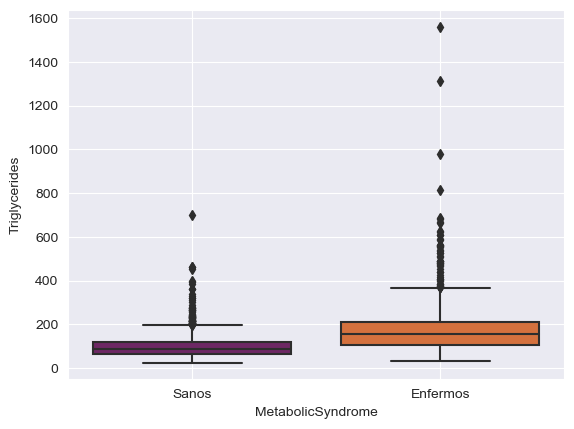

In [13]:
sns.boxplot(x = "MetabolicSyndrome", y="Triglycerides", data = df, palette="inferno")
plt.xticks(ticks =plt.xticks()[0], labels = ["Sanos", "Enfermos"])
plt.grid(True)

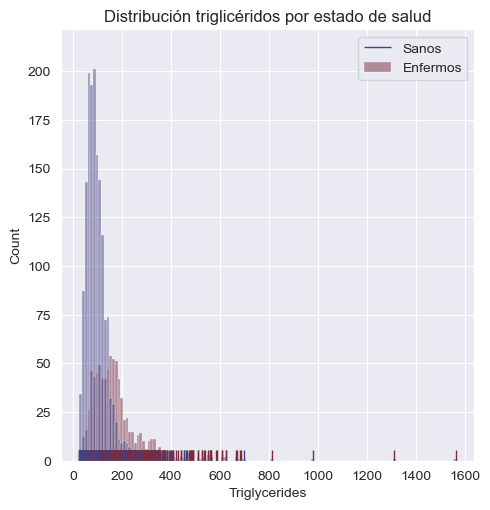

In [20]:
sns.displot(x= "Triglycerides", data = df, hue = "MetabolicSyndrome", rug = True, legend=False, palette="icefire")
plt.title("Distribución triglicéridos por estado de salud")
plt.legend(["Sanos","Enfermos"])
plt.show()

In [21]:
from scipy.stats import shapiro
T_saludable = df[df["MetabolicSyndrome"]==0]["Triglycerides"]
T_enfermo = df[df["MetabolicSyndrome"]==1]["Triglycerides"]

A continucación se realizará un ejercicio similar al que se llevó a cabo con el par de variables "Age" y "MetabolicSyndrome" solo que esta vez empleando el test de Shapiro-Wilk para probar normalidad de los datos. El valor p asociado al ya mencionado es muy bajo en ambos grupos y por lo tanto se concluye que los datos no se comportan de manera normal, adicional a lo anterior también se realizo un test de levene para verificar la homocedasticidad, cuyo resultado se encuentra muy cercano a 0 por lo cual se asume que las varianzas entr grupos no son iguales.

Considerando lo anterior se realiza también un test U de Mann-Whitney para sustentar difernecias significativas entre los grupos:

In [22]:
stat1, T_saludable_p_value = shapiro(T_saludable)
stat2, T_enfermo_p_value = shapiro(T_enfermo)
print(f"el valor p para la prueba de Shapiro-Wilk en los individuos sanos es: {T_saludable_p_value}")
print(f"el valor p para la prueba de Shapiro-Wilk en los individuos enfermos es: {T_enfermo_p_value}")
stat_levene2, T_p_value_levene = levene(T_saludable, T_enfermo)
print(f'Levene test p-value es :{T_p_value_levene}')

el valor p para la prueba de Shapiro-Wilk en los individuos sanos es: 3.7844867626020335e-41
el valor p para la prueba de Shapiro-Wilk en los individuos enfermos es: 7.251466233991819e-35
Levene test p-value es :9.660328789305505e-46


In [23]:
MWU_stat2, p_value_Tglcs = mannwhitneyu(T_saludable, T_enfermo)
print(f'El p-value para la U de Mann - Whitney es :{p_value_Tglcs}')

El p-value para la U de Mann - Whitney es :5.85354378654075e-123


Según el valor p arrojado por la prueba anterior se concluye que existe evidencia estadísticamente significativa para concluir que hay diferencia entre los grupos. Esto se alínea con lo ya relatado en la literatura en donde se ha encontrado asociación entre la parición de síndrome metabólico y la concentración de triacilglicéridos en sangre.

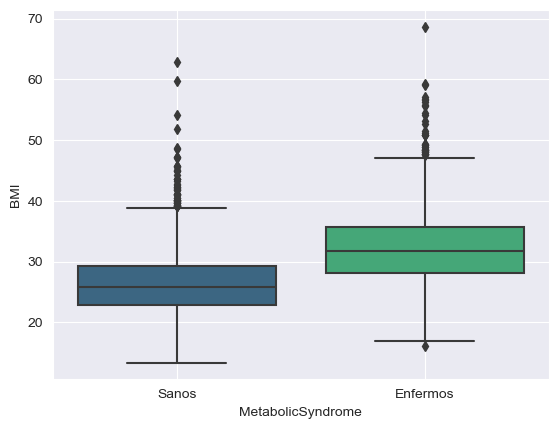

In [22]:
sns.boxplot(x = "MetabolicSyndrome", y="BMI", data = df, palette = "viridis")
plt.xticks(ticks =plt.xticks()[0], labels = ["Sanos", "Enfermos"])
plt.grid(True)

<Figure size 1200x600 with 0 Axes>

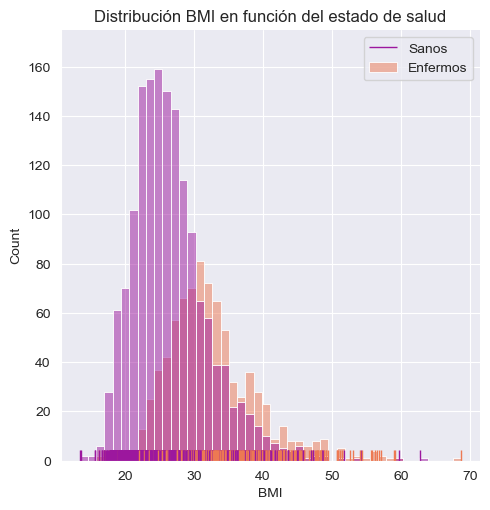

In [30]:
plt.figure(figsize=(12,6))
sns.displot(x= "BMI", data = df, hue = "MetabolicSyndrome", rug = True, palette = "plasma", legend=False)
plt.title("Distribución BMI en función del estado de salud")
plt.legend(labels = ["Sanos","Enfermos"])
plt.show()

En cuanto al índice de masa corporal tanto para las personas sanas como para las personas enferma se evidencia cierta similaridad, enfatizando sin embargo que este debería estar por debajo de 25 para el adulto promedio y para ambos grupos la mayoría de los individuos se encuentran por encima de este límite, esto último más conspicuamente en las personas que presentan el síndrome lo que sugiere cierta relación, esto se abordará a profunidad más adelante.

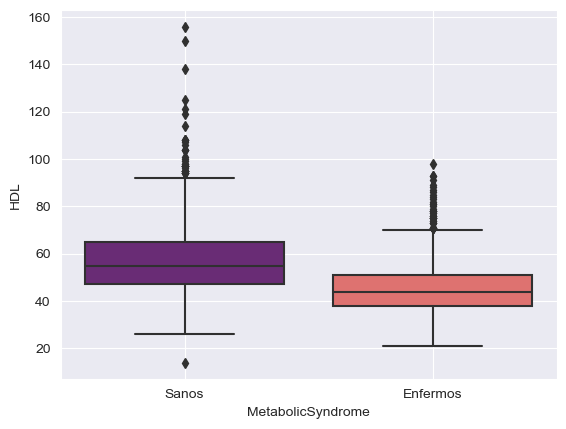

In [24]:
sns.boxplot(x = "MetabolicSyndrome", y="HDL", data = df , palette = "magma")
plt.xticks(ticks =plt.xticks()[0], labels = ["Sanos", "Enfermos"])
plt.grid(True)

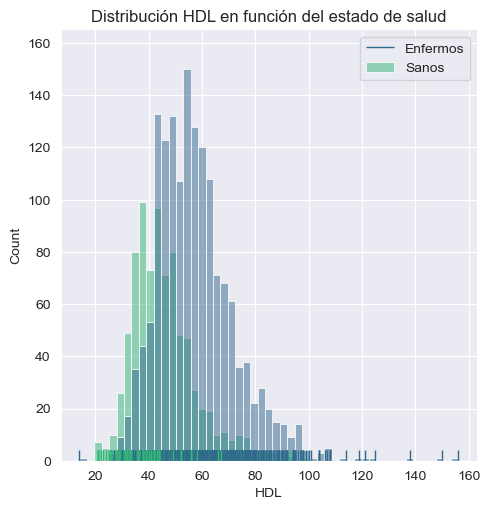

In [33]:
sns.displot(x= "HDL", data = df, hue = "MetabolicSyndrome", rug = True, palette ="viridis", legend=False)
plt.title("Distribución HDL en función del estado de salud")
plt.legend(labels = ["Enfermos","Sanos"])
plt.show()

El colesterol bueno (HDL) se relaciona inversamente con la probabilidad de padecer un ACV o resistencia a la insulina, en general se le considera un buen indicador del metabolismo por lo tanto tiene sentido que se encuentre en en una mayor proporción en personas sanas.

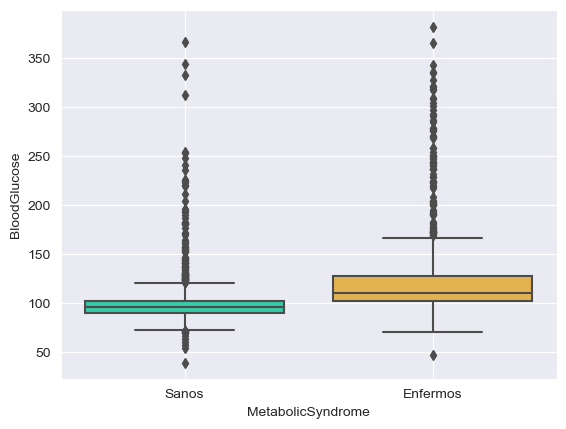

In [27]:
sns.boxplot(x = "MetabolicSyndrome", y="BloodGlucose", data = df , palette = "turbo")
plt.xticks(ticks =plt.xticks()[0], labels = ["Sanos", "Enfermos"])
plt.grid(True)

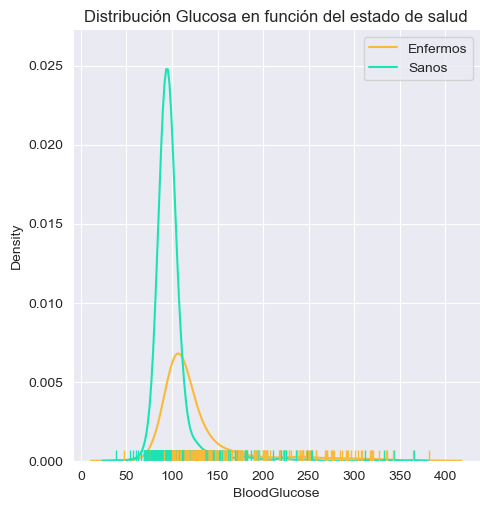

In [28]:
sns.displot(x= "BloodGlucose", data = df, hue = "MetabolicSyndrome", rug = True, kind = "kde", palette ="turbo",legend = False)
plt.title("Distribución Glucosa en función del estado de salud")
plt.legend(labels = ["Enfermos","Sanos"])
plt.show()

Dentro de la relación entre la glucosa (post-ayuno) y el síndrome metabólico llama la atención la gran cantidad de valores atípicos, esto puede deberse a múltiples causas, el tipo de alimentos ingeridos en el día, tabaquismo, actividad física, entre muchas otras. Sin embargo es importante destacar que existe una tendencia menor en la glucosa en sangre en las personas sanas con respecto a las que presentan síndrome metabólico

Para proseguir con el análisis voy a realizar manejo sobre los NA´s y sobre los datos faltantes para aplicar algunas técnicas
de de inferencia más avanzadas.

In [4]:
df[["WaistCirc","BMI", "Marital", "Income"]].isna().sum()

WaistCirc     85
BMI           26
Marital      208
Income       117
dtype: int64

In [5]:
df.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

Como se evidenció al principio, se encuentran algunos datos faltantes para cuatro de las variables estudiadas como se muestra en el apartado inmediatamente anterior a este escrito; antes de poder avanzar más en los anállisis se hace necesario realizar imputación sobre el conjunto de datos con el propósito de capturar la mayor cantidad de información posible estimando aquellos valores faltantes. Para realizar la tarea propuesta se va a implementar la librería de Scikit learn y la técnica de imputación mediada por K-nearest neighbors


La técnica de K vecinos más cercanos permite ocuparnos de los datos faltantes de una manera sencilla, sin embargo esto solo funciona para los datos numéricos, la imputación de valores categóricos es un poco más complicada, en esta ocasión voy a ocuparme de estos campos categóricos asignando un valor a cada uno en función de la probabilidad de ocurrencia de todos los valores ya presentes en esta dimensión, lo realizaré de la siguiente manera: 

In [6]:
from sklearn.impute import KNNImputer
imput = KNNImputer(n_neighbors= 6)
df_ip = df.copy()
faltantes_num = df[["Income", "WaistCirc", "BMI"]]
imputed = imput.fit_transform(faltantes_num)

In [7]:
imputed_val = pd.DataFrame(imputed, columns=["Income", "WaistCirc", "BMI"])
imputed_val.head()

,Income,WaistCirc,BMI
0,8200.0,81.0,23.3
1,4500.0,80.1,23.2
2,800.0,69.6,20.1
3,2000.0,120.4,33.3
4,2300.0,81.1,20.1


In [8]:
df_ip = df_ip.drop(["Income","WaistCirc","BMI"], axis = 1)

In [9]:
df_ip.reset_index(inplace=True)

In [10]:
df_clas = pd.concat([df_ip,imputed_val], axis=1)
df_clas.head()

,seqn,Age,Sex,Marital,Race,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,Income,WaistCirc,BMI
0,62161,22,Male,Single,White,0,3.88,4.9,92,41,84,0,8200.0,81.0,23.3
1,62164,44,Female,Married,White,0,8.55,4.5,82,28,56,0,4500.0,80.1,23.2
2,62169,21,Male,Single,Asian,0,5.07,5.4,107,43,78,0,800.0,69.6,20.1
3,62172,43,Female,Single,Black,0,5.22,5.0,104,73,141,0,2000.0,120.4,33.3
4,62177,51,Male,Married,Asian,0,8.13,5.0,95,43,126,0,2300.0,81.1,20.1


In [11]:
df_clas.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Race                   0
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
Income                 0
WaistCirc              0
BMI                    0
dtype: int64

In [12]:
class_prob = df_clas["Marital"].value_counts(normalize=True)

In [13]:
def imput_marital(data):
    if pd.isna(data):
        data = np.random.choice(class_prob.index, p=class_prob.values)
    return data

In [14]:
df_clas["Marital"] = df_clas["Marital"].apply(lambda x: imput_marital(x))

In [15]:
df_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2401 non-null   object 
 4   Race               2401 non-null   object 
 5   Albuminuria        2401 non-null   int64  
 6   UrAlbCr            2401 non-null   float64
 7   UricAcid           2401 non-null   float64
 8   BloodGlucose       2401 non-null   int64  
 9   HDL                2401 non-null   int64  
 10  Triglycerides      2401 non-null   int64  
 11  MetabolicSyndrome  2401 non-null   int64  
 12  Income             2401 non-null   float64
 13  WaistCirc          2401 non-null   float64
 14  BMI                2401 non-null   float64
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


Ahora que ya no tenemos NA´s es posible implementar algoritmos de machine learning de una manera óptima y hacer inferencias mucho más robustas sobre el conjunto de datos, sin embargo antes de empezar se realizará un análisis de correlación para realizar una selección adecuada de variables. Voy centrarme particularmente en la variable "MetabolicSyndrome" (En otras palabras será nuestra variable objetivo), en las variables cuantitativas y el sexo. Comenzando, sería adecuado reorganizar las columnas del conjunto de datos para luego realizar algunas transformaciones:

In [11]:
df_clas= df_clas[['Age', 'Sex', 'UrAlbCr', 'UricAcid',
       'BloodGlucose', 'HDL', 'Triglycerides', 'Income',
       'WaistCirc', 'BMI', 'MetabolicSyndrome']]

A continuación, se realizó la importación de 2 dependencias de la librería scikit learn, la primera para realizar un proceso de estandarización sobre los datos (MinMaxScaler) y la segunda para segmentar el conjunto de en una porción de entrenamiento y una de testeo (train_test_split). Luego se codificó la variable sexo para asumir el valor de 1 para el género masculino y 0 para el femenino, finalmente se ajustó el escalador a las variables no codificadas de manera que no se perdiera la información que pudieran aportar, también se creo un nuevo dataset con todas las variables asumiendo un valor entre 0 y 1. Lo anterior es importante debido a que los datos normalizados pueden mejorar el desempeño de los algoritmos de machine learning.

Una vez terminado lo anterior procederé a trazar el mapa de calor de la matriz de correlación (calculada como correlación de Pearson) para desvelar cuales son las potenciales variables más relevantes del conjunto con respecto a la variable respuesta:

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
df_clas["Sex"] = df_clas["Sex"].map({"Male":1,"Female":0})
df_No_sex = df_clas.drop(["Sex","MetabolicSyndrome"], axis = 1)
df = scaler.fit_transform(df_No_sex)
df = pd.DataFrame(df, columns=['Age', 'UrAlbCr', 'UricAcid',
       'BloodGlucose', 'HDL', 'Triglycerides', 'Income',
       'WaistCirc', 'BMI'])
df_NN = pd.concat([df,df_clas[["Sex","MetabolicSyndrome"]]], axis = 1)
df_NN.head(9)

,Age,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Income,WaistCirc,BMI,Sex,MetabolicSyndrome
0,0.033333,0.000418,0.326316,0.154519,0.190141,0.037760,0.908046,0.207012,0.179024,1,0
1,0.400000,0.001206,0.284211,0.125364,0.098592,0.019531,0.482759,0.199499,0.177215,0,0
2,0.016667,0.000619,0.378947,0.198251,0.204225,0.033854,0.057471,0.111853,0.121157,1,0
3,0.383333,0.000645,0.336842,0.189504,0.415493,0.074870,0.195402,0.535893,0.359855,0,0
4,0.516667,0.001136,0.336842,0.163265,0.204225,0.065104,0.229885,0.207846,0.121157,1,0
5,1.000000,0.001416,0.315789,0.192420,0.232394,0.048177,0.000000,0.469950,0.273056,1,0
6,0.100000,0.001318,0.378947,0.139942,0.330986,0.009115,1.000000,0.186978,0.157324,1,0
7,0.166667,0.001245,0.515789,0.128280,0.239437,0.042318,0.678161,0.200334,0.162749,0,0
8,0.833333,0.007470,0.378947,0.166181,0.147887,0.031901,0.080460,0.401224,0.389090,1,0


<Axes: >

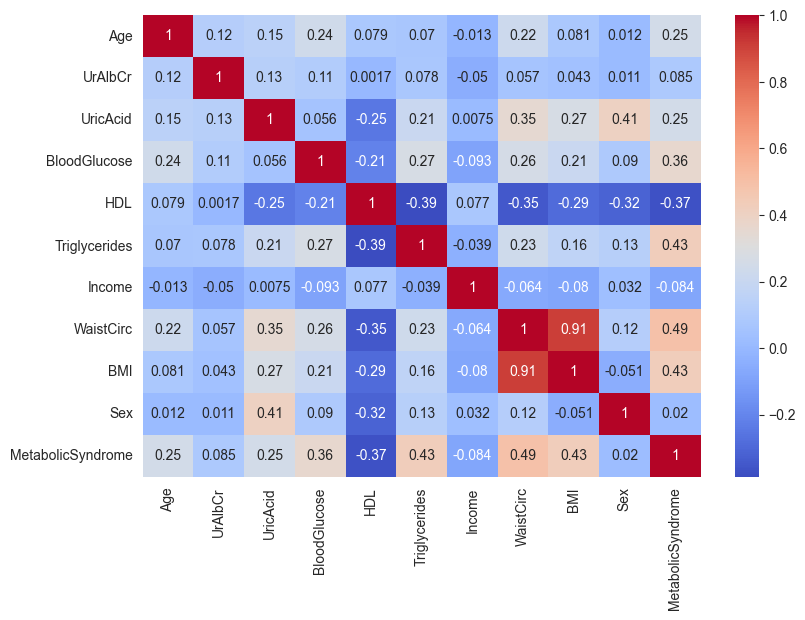

In [17]:
plt.figure(figsize=(9,6))
sns.heatmap(df_NN.corr(), cmap = "coolwarm", annot = True)

Como regla observacional consideraré como relevante cualquier variable con un coeficiente de ocrrelación mayor a 0.3, a simplevista parecen haber 6 varibles que cumplen con esta condición. Extraigamos la columna correspondiente a la variable objetivo y observemos más de cerca en búsqueda de las relaciones lineales evidenciadas:

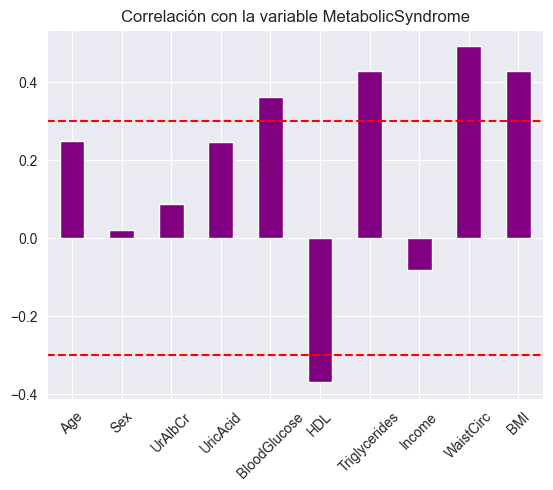

In [18]:
df_clas.corr()["MetabolicSyndrome"][:-1].plot(kind="bar", color="purple")
plt.title("Correlación con la variable MetabolicSyndrome")
plt.xticks(rotation=45)
plt.axhline(y = 0.3, color='r', linestyle='--', label='Línea Horizontal')
plt.axhline(y = -0.3, color='r', linestyle='--', label='Línea Horizontal')
plt.show()

En esta figura puede visualizarse de una mejor manera aquellas variables que cumplen con el mínimo de correlación propuesto (marcado con la línea roja punteada). Con una relación lineal directa se encuentran BMI, WaistCirc, Triglycerides y Bloodglucose, es decir que al aumentar también aumentan la posibilidad la posibilidad de desarrolar síndrome metabólico, también se visualiza una variable que guarda una relación lineal inversa con la probabilidad de desarrollar síndrome metabólico (HDL) o que en otras palabras al aumentar produce un decenso en la posibilidad de su desarrollo.

Teniendo en cuenta lo anterior voy a visualizar los datos usando una técnica de reducción de dimensionalidad para intentar averiguar posibles relaciones que no sean observables de manera tan sencilla, en este caso en particular emplearé PCA

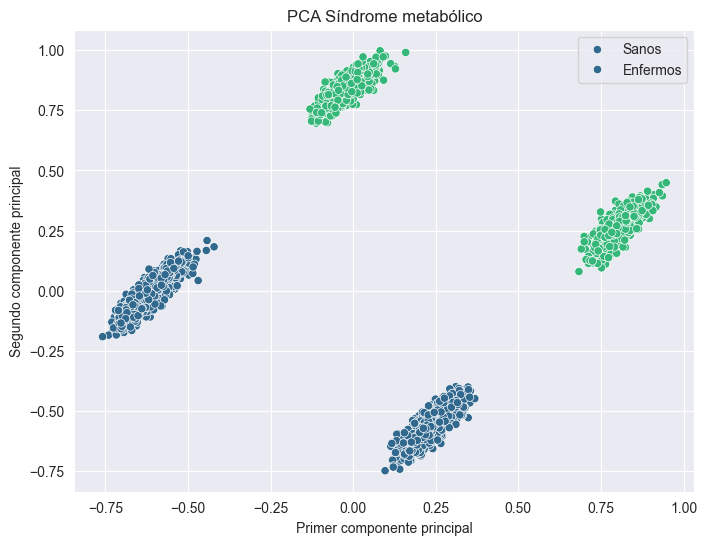

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
meta_synd_PCA = pca.fit_transform(df_NN)
meta_synd = pd.DataFrame(meta_synd_PCA)
plt.figure(figsize=(8,6))
sns.scatterplot(x = meta_synd[0], y =meta_synd[1], hue =df_NN['MetabolicSyndrome'], palette="viridis")
plt.xlabel('Primer componente principal')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title("PCA Síndrome metabólico")
plt.legend(labels = ["Sanos","Enfermos"])
plt.show()

Tras usar la PCA encontramos 4 agrupamientos conspicuamente delimitados, puesto que no sabemos que rasgos podrían estar agrupando a estas observaciones es posible llevar a cabo un procedimiento de clustering y realizar una análisis sobre los resultados para saber que rasgos contribuyen a este tipo de patrones en particular. Realizaré dicho análisis así:

A simple vista se encuentran 4 agrupaciones de puntos, no obstante usaré una métrica para la evaluación de calidad de los clusters llamada Within Cluster Sum of Squares o WCSS que permiterte establecer la calidad del cluster en función de la similaridad de los puntos que lo conforman, esta es la base de la técnica llamada Elbow method o el método del codo que permite visualizar una figura que describe el error dentro de los clusters como función del número de formación de los mismos. De manera simple con esta técnica puede establecerse el mejor número de clusters a formar.

In [66]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,16):
    kmeans = KMeans(i, n_init="auto")
    kmeans.fit(df_NN)
    WCSS_inertia= kmeans.inertia_
    WCSS.append(WCSS_inertia)

Como interpretación de la figura debajo de este párrafo, puede verse como el error intra-cluster disminuye de manera drástica cada vez que aumenta el número de clusters, para en contrar el número ideal de clusters lo ideal es ubicar el punto en el cual el error deja deja descender de manera abrupta y generalmente este punto al cual se hace referencia como el codo corresponde con el número idóneo de agrupamientos, no obstante, de manera habitual esto no se detemina con un valor puntual sino que en cambio se encuentra entre un rango de valores y es en este momento donde el conocimiento de dominio o la visualización previa de los datos puede ayudar en su elección, dada la creación del diagrama de dispersión con la PCA y la figura anterior puede concluirse que efectivamente el valor adecuado de clusters es 4, tanto por la visualización como por el intervalo de valores que muestra la graficación de WCSS contra le número de clusters

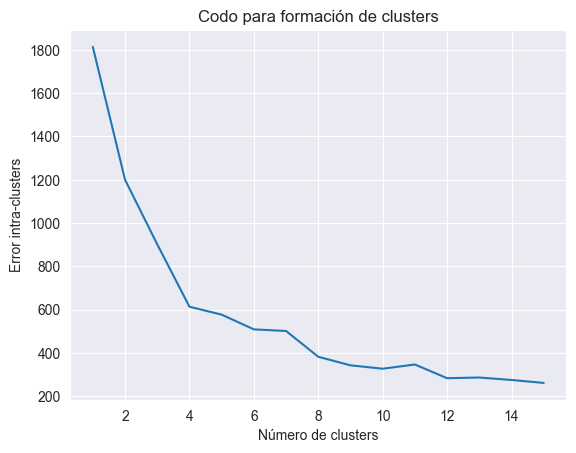

In [67]:
num = range(1,16)
plt.plot(num,WCSS)
plt.title("Codo para formación de clusters")
plt.ylabel("Error intra-clusters")
plt.xlabel("Número de clusters")
plt.show()

In [68]:
kmeans = KMeans(4, n_init="auto")
kmeans.fit(df_NN)
df_clas["Cluster"] = kmeans.labels_
df_clas.head()

,Age,Sex,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Income,WaistCirc,BMI,MetabolicSyndrome,Cluster
0,22,1,3.88,4.9,92,41,84,8200.0,81.0,23.3,0,1
1,44,0,8.55,4.5,82,28,56,4500.0,80.1,23.2,0,2
2,21,1,5.07,5.4,107,43,78,800.0,69.6,20.1,0,1
3,43,0,5.22,5.0,104,73,141,2000.0,120.4,33.3,0,2
4,51,1,8.13,5.0,95,43,126,2300.0,81.1,20.1,0,1


<Axes: xlabel='0', ylabel='1'>

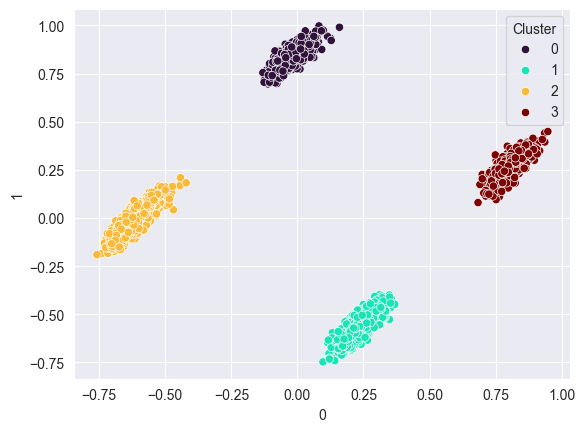

In [71]:
sns.scatterplot(x = meta_synd[0], y =meta_synd[1], data = meta_synd, hue =df_clas['Cluster'], palette="turbo")

Tras la aplicación de PCA y el proceso de clusterización puede verse que cada uno tiene su color y por lo tanto cada uno tiene sus propias características a investigar, sin embargo dado que no es eobjetivo principal de este trabajo se dejará hasta aquí para futuros análisis.

Ahora tras haber extraido cada cluster voy a computar el porcentaje de varianza explicado por cada componente y una visualización que permita crear una mejor idea de que variables son las que más estan contribuyendo a la agrupación de estos clusters, o en otras palabras que variables son las que más influyen en dicha estructura de agrupación:

In [72]:
Componentes = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["%_var_explicado"])
Componentes

,%_var_explicado
0,34.748162
1,31.973985


Partiendo del fundamento de PCA que plantea que más varianza explicada se traduce en una mayor cantidad de información aportada por el modelo, se realizó en la parte siguiente un mapa de calor que brinda una idea de que tanta varianza aporta cada variable dentro de cada componente y por consiguiente esto brinda una idea de cuales son las variables que más podrían estar ayudando a explicar los agrupamientos obtenidos, mientras más alejado de 0 más grande es el aporte de dicha variable dentro de cada componente 

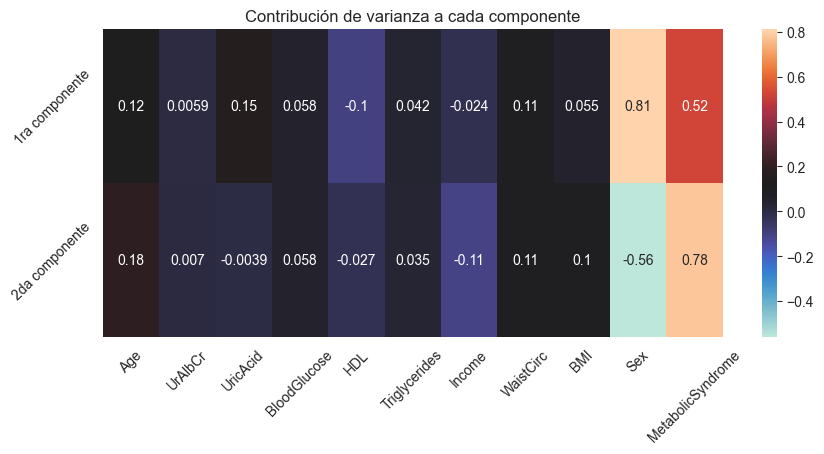

In [73]:
plt.figure(figsize=(10,4))
plt.title("Contribución de varianza a cada componente")
sns.heatmap(pca.components_, annot=True, cmap="icefire")
plt.yticks(ticks= plt.yticks()[0], labels =["1ra componente","2da componente"], rotation = 45)
plt.xticks(ticks=plt.xticks()[0], labels=pca.feature_names_in_, rotation = 45)
plt.show()

Para finalizar crearé una red neuronal que me permita clasificar a partir de la información que pudimos extraer del conjunto de datos, sin embargo como se mostró en la bar plot al principio del documento puede verse que la variable respuesta presenta un imbalance en sus clases, la clase 0 (sano) tiene aproximadamente el doble de observaciones que clase 1 (Enfermo). Para solucionar esto usaré una técnica llamada SMOTE que funciona a partir de la técnica de K vecinos más cercanos para obtener resampleos que no conlleven a un sobreajuste del modelo, como ocurriría si solo hiciéramos resampleo con reemplazo (sin descartar esto último como una opción en escenarios particulares). Continuando:

In [13]:
from imblearn.over_sampling import SMOTE
X = df_NN.drop("MetabolicSyndrome", axis = 1)
y = df_NN["MetabolicSyndrome"]
X_resamp, y_resamp = SMOTE().fit_resample(X,y)

In [14]:
y_resamp.value_counts()

MetabolicSyndrome
0    1579
1    1579
Name: count, dtype: int64

Ahora que las clases están balanceadas crearé la red neuronal

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
tf.random.set_seed(96)

Es importante crear 3 segmentaciones de datos uno para entrenamiento otro de validación y otro para testeo, esto con el fin de mantener un registro cercano de como se está entrenando y desempeñando el modelo, ya que solo así puede tenerse una idea sobre si realmente el modelo es eficaz o no. Acontinuación genero estas 3 particiones previo a la generación del modelo

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_resamp, y_resamp, test_size=0.15, shuffle=True)

In [17]:
tr_len = int(len(X_train)*0.85)
val_len = int(len(X_train)*0.15)
print(tr_len, val_len)

2281 402


In [18]:
X_tr = X_train[:tr_len]
X_val = X_train[tr_len:]
y_tr = y_train[:tr_len]
y_val = y_train[tr_len:]
print(X_tr.shape, X_val.shape, y_tr.shape,y_val.shape)

(2281, 10) (403, 10) (2281,) (403,)


In [19]:
print(X_test.shape, y_test.shape)

(474, 10) (474,)


In [20]:
modelo = Sequential([
    Dense(64, activation='relu', input_shape=(10,)), Dropout(0.4),
    Dense(32, activation='relu'), Dropout(0.3),
    Dense(1, activation='sigmoid')
])
modelo.compile(optimizer="adam" , loss='binary_crossentropy', metrics=['accuracy'])
modelo.fit(X_tr, y_tr,epochs=100, batch_size=32, verbose = 0, validation_data=(X_val, y_val))

C:\Users\Juandi\anaconda3\envs\JD_average\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Una vez terminado el entrenamiento se grafican las curvas de pérdida y precisión  tanto para el conjunto de datos de entrenamiento como para el de validación, con el fin de tener una confirmación visual de que no está ocurriendo un sobreajuste del modelo y que por tanto su aplicabilidad y desempeño a conjuntos de datos que no ha visto sea la mejor posible

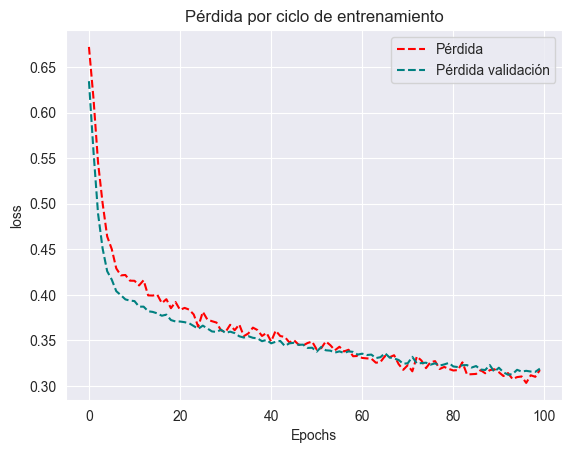

In [21]:
plt.title("Pérdida por ciclo de entrenamiento")
plt.plot(modelo.history.history["loss"], label ="Pérdida", linestyle = "dashed", color = "red" )
plt.plot(modelo.history.history["val_loss"], label ="Pérdida validación", linestyle = "dashed", color = "teal" )
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

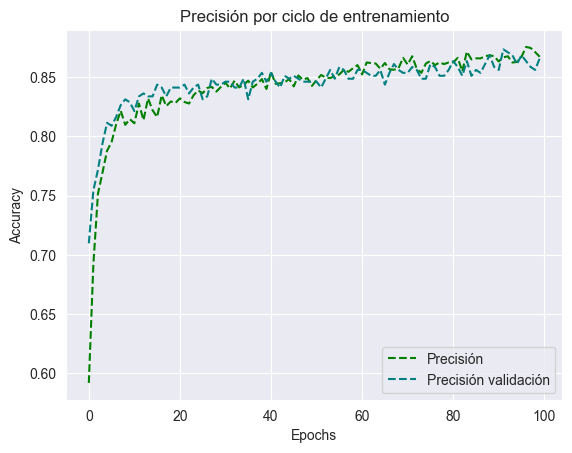

In [22]:
plt.title("Precisión por ciclo de entrenamiento")
plt.plot(modelo.history.history['accuracy'], label='Precisión', linestyle="dashed", color = "green")
plt.plot(modelo.history.history["val_accuracy"], label ="Precisión validación", linestyle = "dashed", color = "teal" )
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
Predicciones = pd.DataFrame(modelo.predict(X_test))
Predicciones = Predicciones.apply(lambda x : round(x))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [24]:
print(classification_report(y_test, Predicciones))

              precision    recall  f1-score   support

           0       0.91      0.83      0.86       236
           1       0.84      0.92      0.88       238

    accuracy                           0.87       474
   macro avg       0.87      0.87      0.87       474
weighted avg       0.87      0.87      0.87       474



A continuación, presento un resumen de los resultados del modelo de clasificación:

Precisión (Precision): La precisión del modelo para predecir la presencia o ausencia de síndrome metabólico es del 91% para la clase negativa (no padecimiento) y del 84% para la clase positiva (padecimiento). Esto indica que, de todas las predicciones positivas que hizo el modelo, el 84% eran realmente positivas, y de todas las predicciones negativas, el 91% eran realmente negativas.
Recall (Sensibilidad): El recall del modelo, que representa la capacidad del modelo para identificar correctamente las instancias positivas, es del 83% para la clase negativa y del 92% para la clase positiva. Esto significa que el modelo es capaz de capturar el 83% de todas las instancias reales de la clase negativa y el 92% de todas las instancias reales de la clase positiva.
F1-score: El F1-score es una medida que combina la precisión y el recall en un solo valor. Para nuestro modelo, el F1-score es similar para ambas clases. Esto indica un buen equilibrio entre la precisión y el recall, lo que sugiere que nuestro modelo es capaz de realizar predicciones precisas tanto para la presencia como para la ausencia de síndrome metabólico.
Exactitud (Accuracy): La exactitud general del modelo es del 87%, lo que significa que el 87% de todas las predicciones del modelo son correctas. Esta métrica es importante para evaluar el rendimiento general del modelo en todas las clases.

Finalmente realizaré un mapa de calor con las clasificaciones realizadas para visualizar con más profundidad los resultados mencionados y de qué información provienen

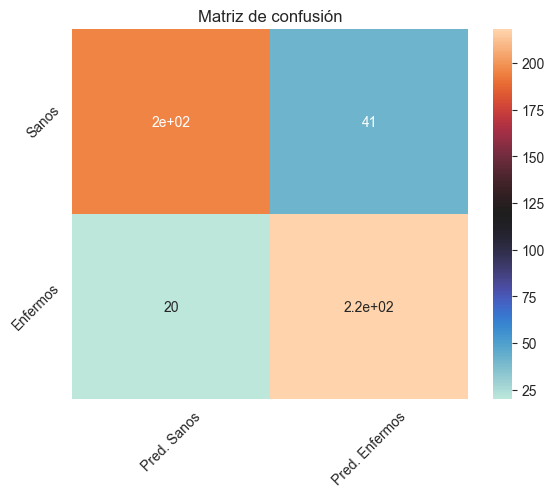

In [25]:
plt.title("Matriz de confusión")
sns.heatmap(confusion_matrix(y_test, Predicciones), annot=True, cmap = "icefire")
plt.yticks(ticks= plt.yticks()[0], labels =["Sanos","Enfermos"], rotation = 45)
plt.xticks(ticks = plt.xticks()[0], labels = ["Pred. Sanos", "Pred. Enfermos"], rotation = 45)
plt.show()